In [89]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
!pip install --upgrade seaborn
import warnings

# Ignore future warnings for the sake of clarity in the notebook
warnings.simplefilter(action='ignore', category=FutureWarning)


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [90]:
import tensorflow as tf

# Check if GPU is available
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

# Force TensorFlow to use the GPU
if tf.test.gpu_device_name():
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else:
    print("GPU not found")

Num GPUs Available:  1
Default GPU Device: /device:GPU:0


## Load The data

In [91]:
df=pd.read_csv('/kaggle/input/titanic/train.csv')
test=pd.read_csv('/kaggle/input/titanic/test.csv')

In [92]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [93]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [94]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## EDA 

<Axes: xlabel='Survived'>

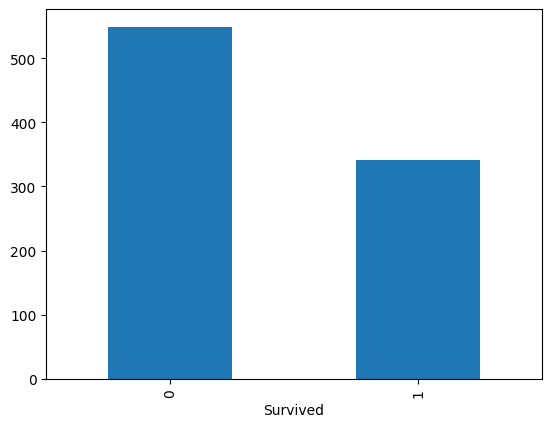

In [96]:
df.Survived.value_counts().plot.bar()

<Axes: xlabel='Survived'>

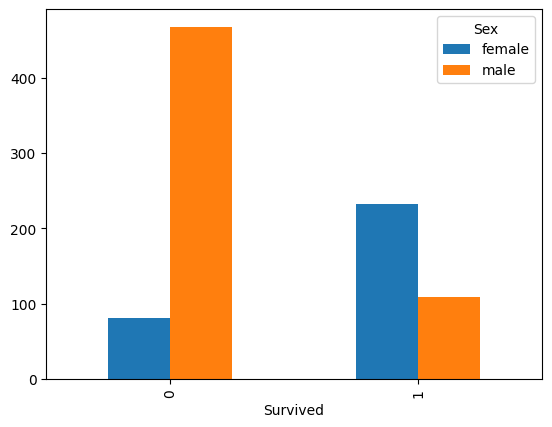

In [97]:
df.groupby(['Survived', 'Sex']).PassengerId.count().unstack().plot.bar()

##

<Axes: xlabel='Survived'>

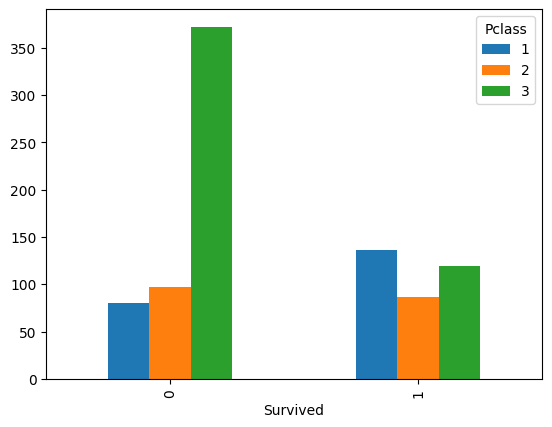

In [98]:
df.groupby(['Survived', 'Pclass']).PassengerId.count().unstack().plot.bar()

<Axes: xlabel='Survived'>

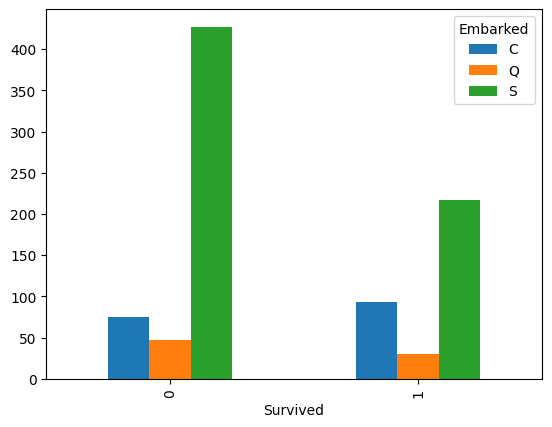

In [99]:
df.groupby(['Survived', 'Embarked']).PassengerId.count().unstack().plot.bar()

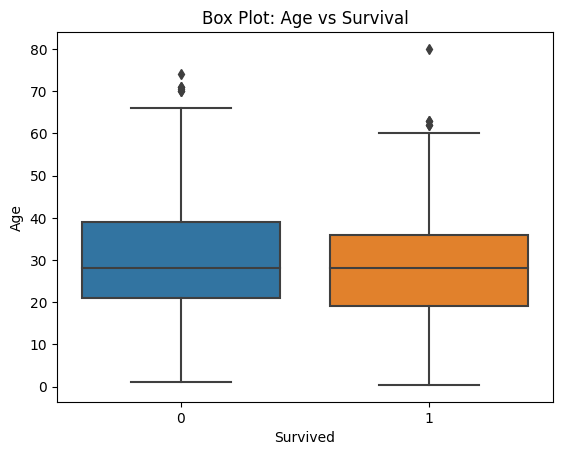

In [100]:
sns.boxplot(x='Survived', y='Age', data=df)
plt.title('Box Plot: Age vs Survival')
plt.show()


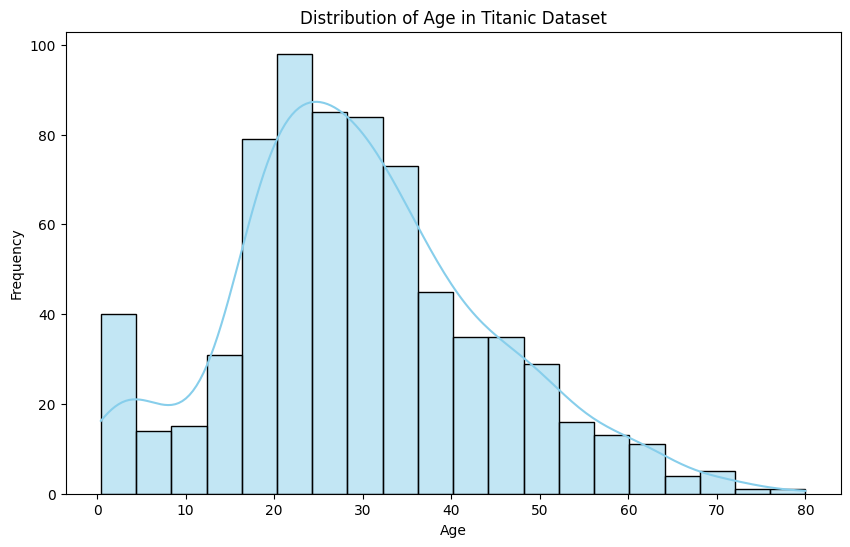

In [101]:
# Create a histogram to visualize the distribution of age
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Age in Titanic Dataset')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [102]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

#convert categorical values to numreical and drop unneeded columnus for train Data 

df['Sex']= label_encoder.fit_transform(df['Sex'])
df['Embarked']= label_encoder.fit_transform(df['Embarked'])
df = df.drop(['Name', 'Cabin', 'Ticket'], axis=1)
test['Sex']= label_encoder.fit_transform(test['Sex'])
test['Embarked']= label_encoder.fit_transform(test['Embarked'])
test = test.drop(['Name', 'Cabin', 'Ticket'], axis=1)

In [103]:
#check for null values 
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         0
dtype: int64

In [104]:
test.isnull().sum()

PassengerId     0
Pclass          0
Sex             0
Age            86
SibSp           0
Parch           0
Fare            1
Embarked        0
dtype: int64

### As the Age feature had many outliers and skewed distrubtion so we will use medain to fill the missing values 

In [105]:
# Calculate the mean of the 'Age' column
median_age = df['Age'].median()

# Impute missing values with the mean in both datasets
df['Age'].fillna(median_age, inplace=True)
test['Age'].fillna(median_age, inplace=True)
test['Fare'].fillna(0, inplace=True)

#checking 
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

## Create Model and Testing it : 


In [106]:
from sklearn.model_selection import train_test_split
X = df.drop(['Survived', 'PassengerId'],axis=1)
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [107]:
#Preapare ou X and y
#X_train = df.drop(columns=['Survived'])
#y_train = df['Survived']
#X_test = test

## SVM 

In [108]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.impute import SimpleImputer

# Create an SVM model
svm_model = SVC(kernel='linear', C=100)
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test)

#Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

#Print the evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)

Accuracy: 0.78
Confusion Matrix:
[[87 18]
 [22 52]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.83      0.81       105
           1       0.74      0.70      0.72        74

    accuracy                           0.78       179
   macro avg       0.77      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179



In [109]:
from sklearn.ensemble import RandomForestClassifier
# Create a Random Forest model
random_forest_model = RandomForestClassifier(n_estimators=130, max_depth=10, random_state=42)

# Train the model
random_forest_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = random_forest_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(report)

Accuracy: 0.8212
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.90      0.85       105
           1       0.83      0.72      0.77        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



## NeuralNetwork Model 

In [110]:
import torch 
from torch import nn 
#convert our data to Numpy 
X=X.values
y=y.values 
#Turn data into tensors 
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




In [111]:
len(X_train), len(X_test), len(y_train), len(y_test)

(712, 179, 712, 179)

In [112]:
from torch import nn

# Build model
class NN_Model(nn.Module):
    def __init__(self, input_features, output_features, hidden_units=256):

        super().__init__()
        self.linear_layer_stack = nn.Sequential(
            nn.Linear(in_features=input_features, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=hidden_units),
            nn.ReLU(), 
            nn.Linear(in_features=hidden_units, out_features=output_features),
                 
        )
    
    def forward(self, X):
        return self.linear_layer_stack(X)

# Create an instance of BlobModel and send it to the target device
model = NN_Model(input_features=7, 
                    output_features=1, 
                    hidden_units=256)
model

NN_Model(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=7, out_features=256, bias=True)
    (1): ReLU()
    (2): Linear(in_features=256, out_features=256, bias=True)
    (3): ReLU()
    (4): Linear(in_features=256, out_features=1, bias=True)
  )
)

In [113]:
#setting loss function and the optimizer 
loss_fn = nn.BCEWithLogitsLoss() 
# Create an optimizer
optimizer = torch.optim.Adam(params=model.parameters(), 
                            lr=0.001)

### Training loop

In [114]:
from sklearn.metrics import accuracy_score
# Fit the model
torch.manual_seed(42)
epochs =1000
for epoch in range(epochs):
    #set the model to train 
    model.train()
    #forward pass
    y_pred=model(X_train).squeeze()
    #calculate the loss
    Loss=loss_fn(y_pred,y_train)
    #set optim to zero
    optimizer.zero_grad()
    #backpropgation 
    Loss.backward()
    #optimizer step 
    optimizer.step()
    
    #Evaluate the model 
    model.eval()
    with torch.inference_mode():
        test_pred=model(X_test).squeeze()
        test_loss= loss_fn(test_pred,y_test)
        
    if epoch%50==0:
        print( f"epoch {epoch} |loss{Loss} |test_loss {test_loss} ")
        


epoch 0 |loss0.7160044312477112 |test_loss 2.2623023986816406 
epoch 50 |loss0.5674866437911987 |test_loss 0.5462222099304199 
epoch 100 |loss0.4853971600532532 |test_loss 0.4989040195941925 
epoch 150 |loss0.4225102961063385 |test_loss 0.45235660672187805 
epoch 200 |loss0.39738014340400696 |test_loss 0.4419027864933014 
epoch 250 |loss0.3855440020561218 |test_loss 0.44915542006492615 
epoch 300 |loss0.37173470854759216 |test_loss 0.44242018461227417 
epoch 350 |loss0.36232098937034607 |test_loss 0.44439896941185 
epoch 400 |loss0.3545413613319397 |test_loss 0.44804033637046814 
epoch 450 |loss0.34830889105796814 |test_loss 0.45054396986961365 
epoch 500 |loss0.34330448508262634 |test_loss 0.4499019384384155 
epoch 550 |loss0.33420711755752563 |test_loss 0.4513452649116516 
epoch 600 |loss0.44629040360450745 |test_loss 0.534010112285614 
epoch 650 |loss0.32609331607818604 |test_loss 0.4496530592441559 
epoch 700 |loss0.3207416236400604 |test_loss 0.45465701818466187 
epoch 750 |loss0.

### I will use RFC for submission

In [115]:
#Create a  DataFrame with the passengers ids and our prediction regarding whether they survived or not
#submission = pd.DataFrame({'PassengerId':test['PassengerId'],'Survived':predictions})

#Visualize the first 5 rows
#submission.head()

In [116]:
#Convert DataFrame to a csv file that can be uploaded
#This is saved in the same directory as your notebook
#filename = 'Titanic Predictions 1.csv'

#submission.to_csv(filename,index=False)

#print('Saved file: ' + filename)